In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('gdp.csv')
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [4]:
missing_values = df.isnull()
missing_values.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [5]:
x = 0
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")
    

Country
False    196
Name: Country, dtype: int64

2020
False    196
Name: 2020, dtype: int64

2021
False    194
True       2
Name: 2021, dtype: int64

2022
False    194
True       2
Name: 2022, dtype: int64

2023
False    194
True       2
Name: 2023, dtype: int64

2024
False    192
True       4
Name: 2024, dtype: int64

2025
False    189
True       7
Name: 2025, dtype: int64



In [6]:
df.dtypes

Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object

In [7]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [8]:
df[['2021','2022','2023','2024','2025']] = df[['2021','2022','2023','2024','2025']].fillna(
    df[['2021','2022','2023','2024','2025']].median()
)


In [9]:
import seaborn as sns

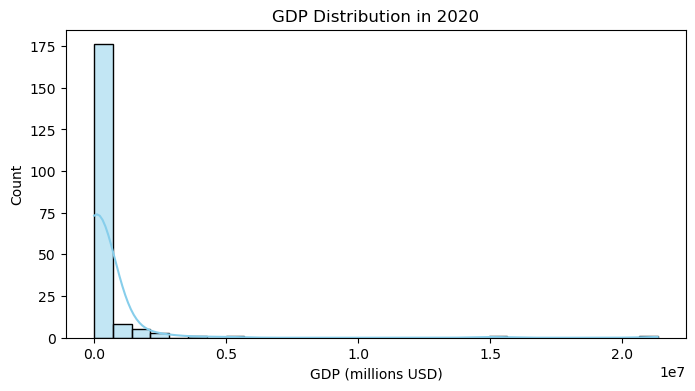

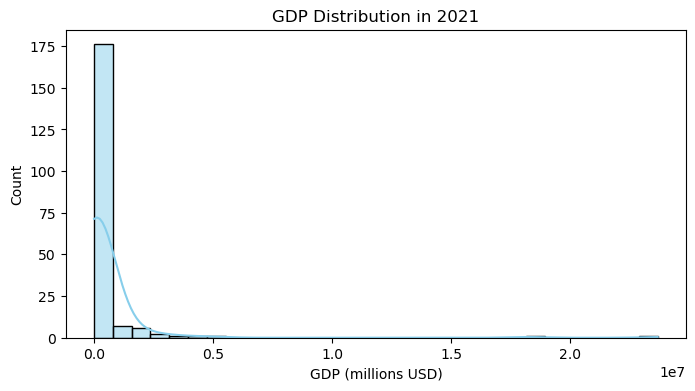

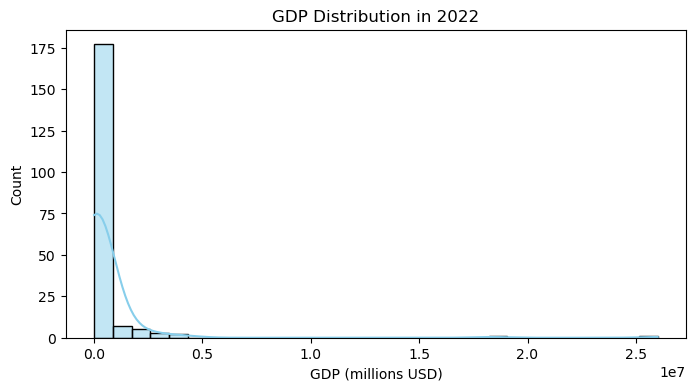

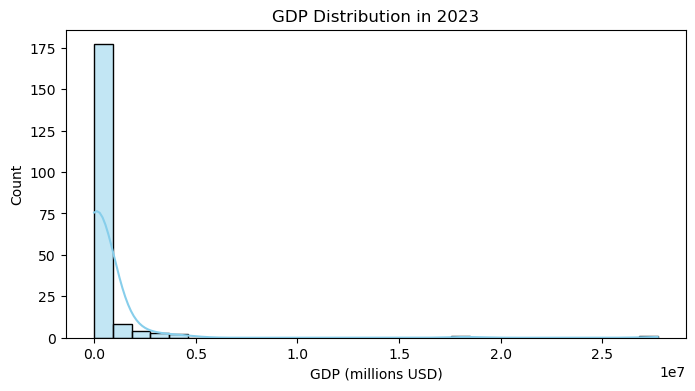

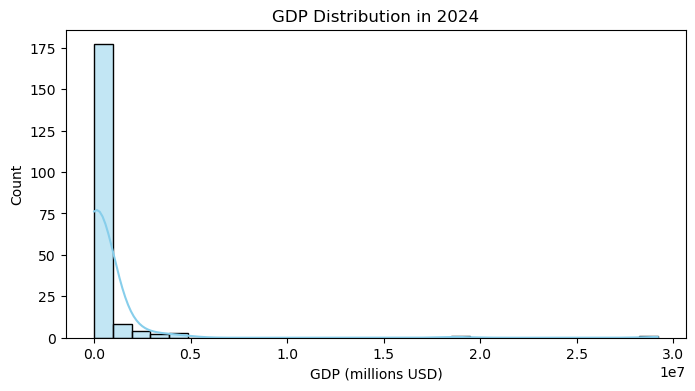

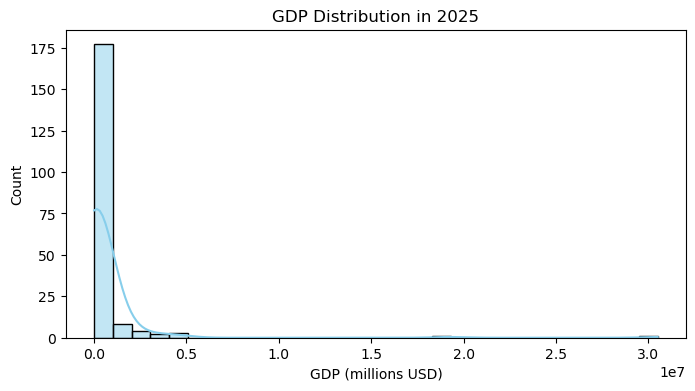

In [10]:
years = ['2020','2021','2022','2023','2024','2025']
for year in years:
    plt.figure(figsize=(8,4))
    sns.histplot(df[year], kde=True, bins=30, color='skyblue')
    plt.title(f"GDP Distribution in {year}")
    plt.xlabel("GDP (millions USD)")
    plt.show()


In [11]:
print(df.shape)

(196, 7)


d:\Rushikesh\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


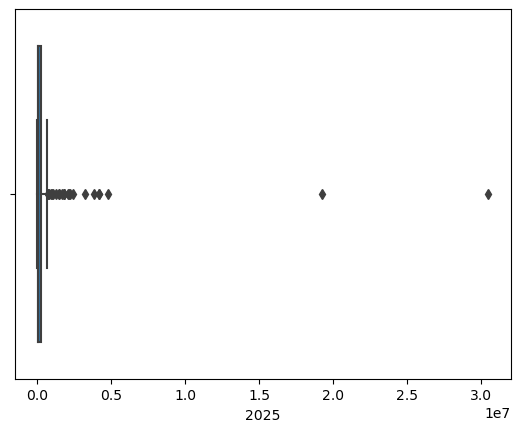

In [12]:
sns.boxplot(df[year])
plt.show()

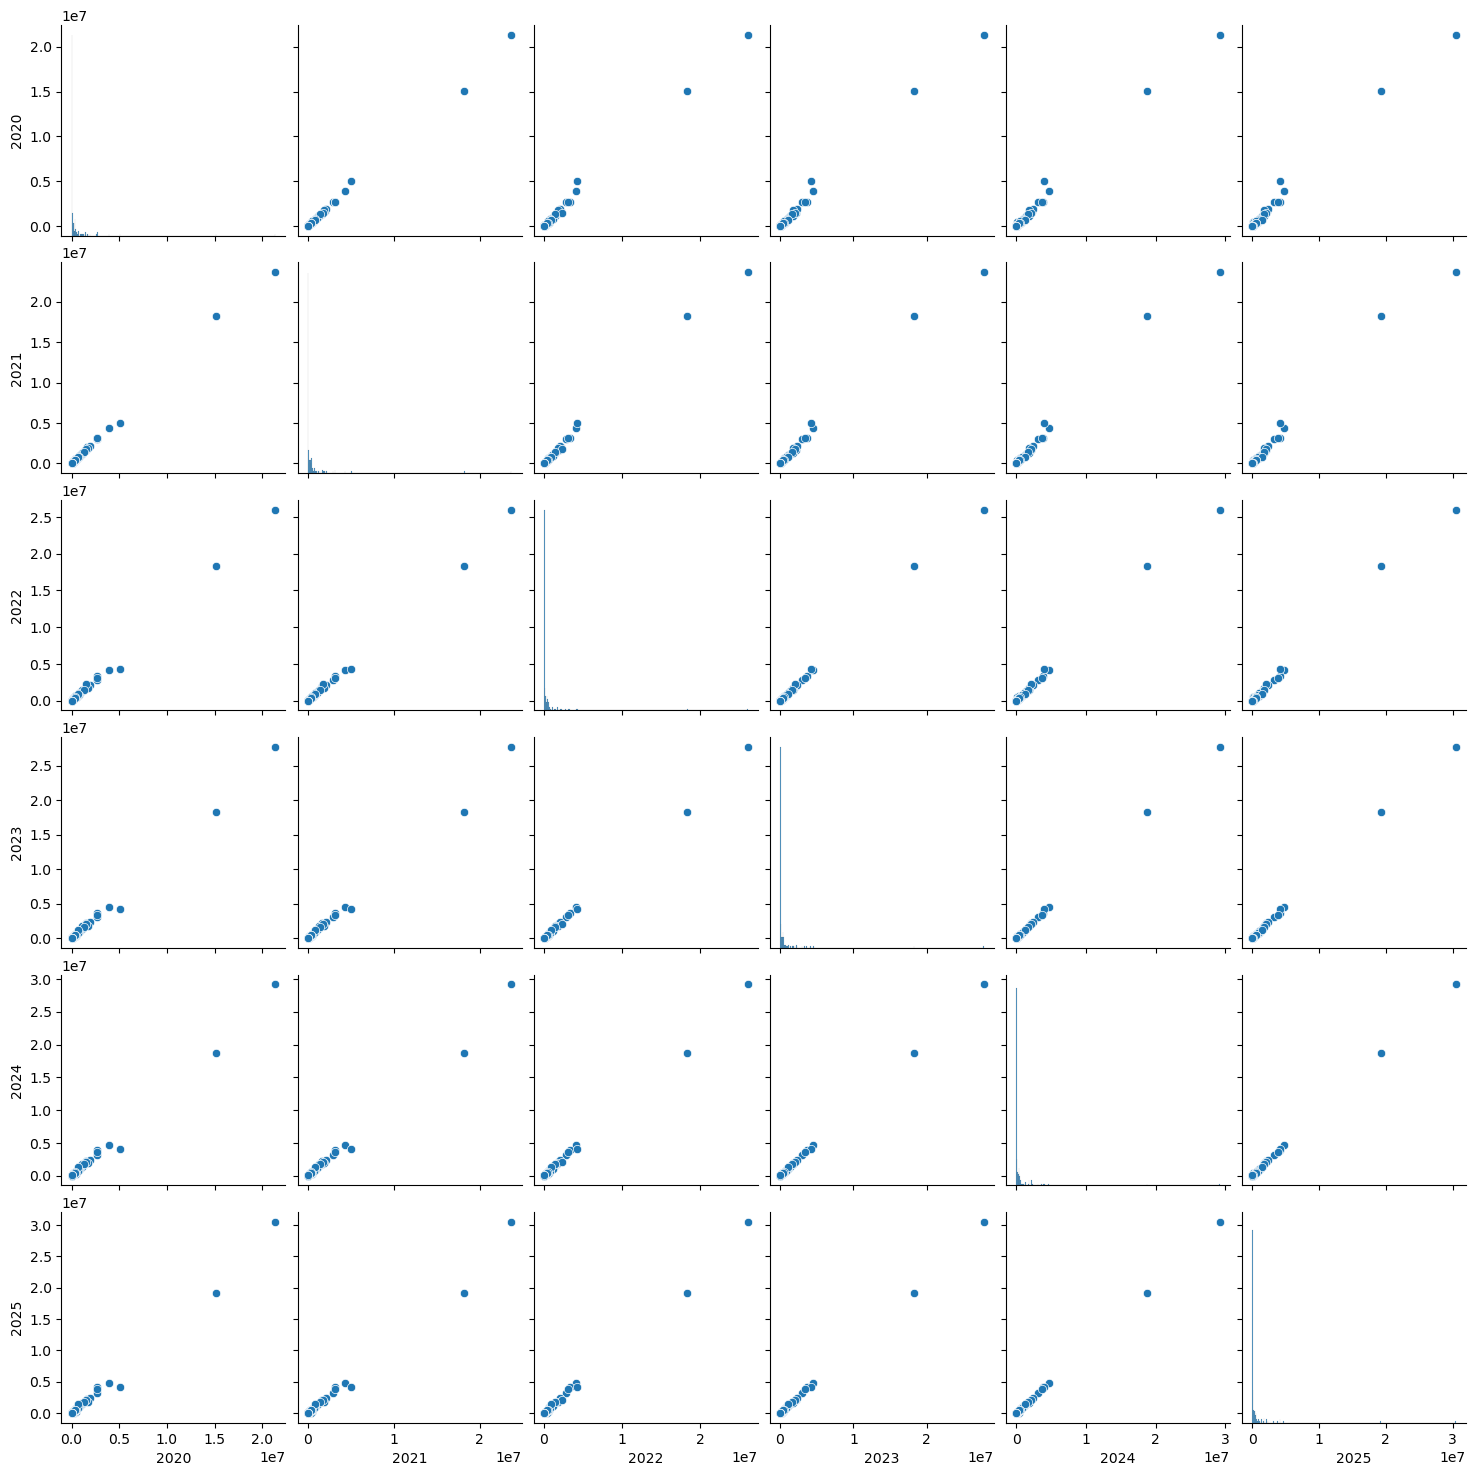

In [13]:
sns.pairplot(df[years])
plt.show()

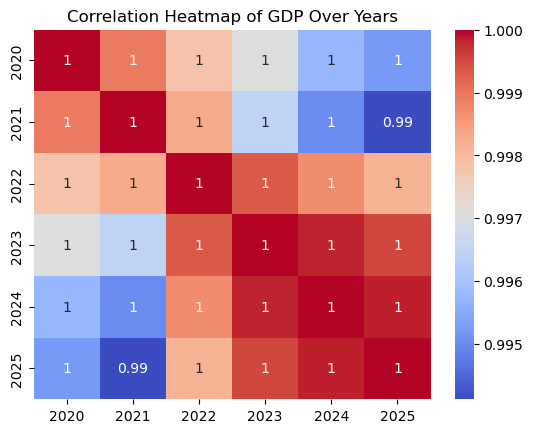

In [14]:
sns.heatmap(df[years].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of GDP Over Years")
plt.show()

In [15]:
for column in df.columns.values:
    print(df[column].count())
    

196
196
196
196
196
196
196


In [16]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,47135.5,47829.0
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [17]:
for country in df["Country"]:
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cape Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Democratic Republic of the Congo
Republic of the Congo
Costa Rica
Ivory Coast
Croatia
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
South Korea
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macau
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marsha

In [18]:
for row in df:
    print(row)

Country
2020
2021
2022
2023
2024
2025


Growth Percentage over the years


In [19]:
for i in range(1, len(years)):
    df[f"Growth_{years[i]}"] = (df[years[i]] - df[years[i-1]]) / df[years[i-1]] * 100


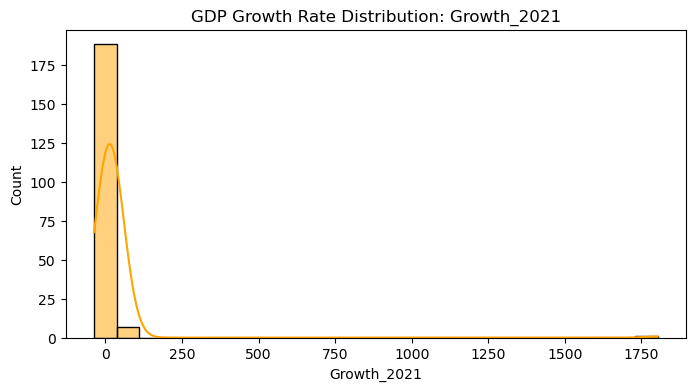

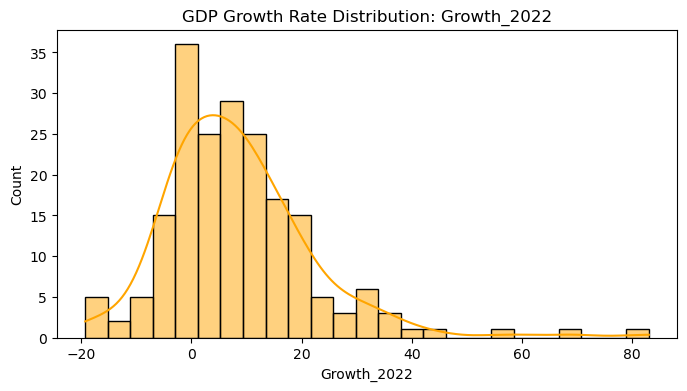

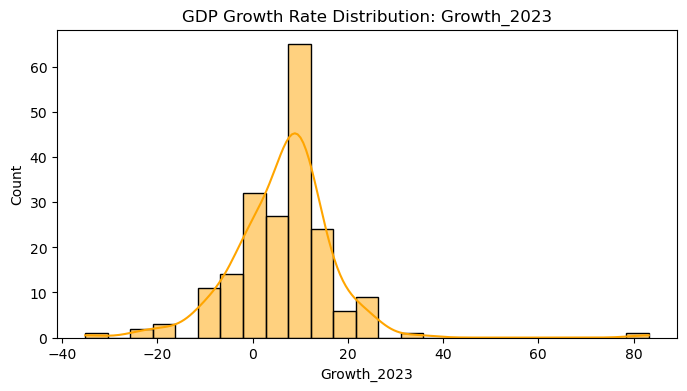

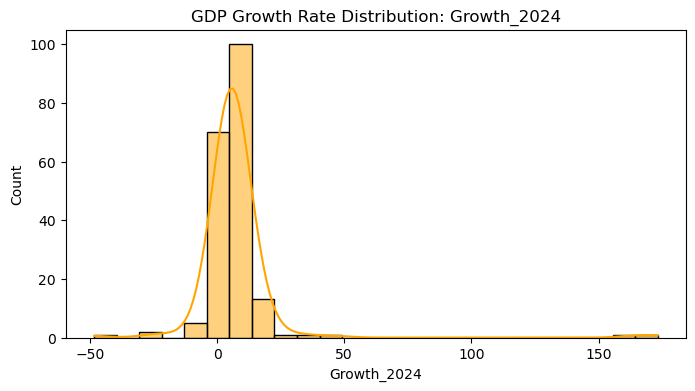

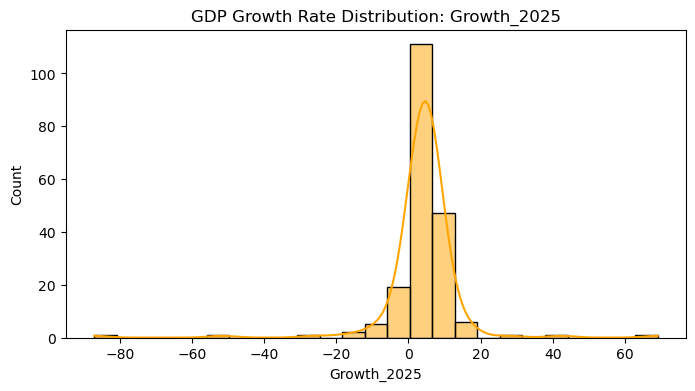

In [20]:
growth_cols = [col for col in df.columns if "Growth" in col]
for col in growth_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='orange', bins=25)
    plt.title(f"GDP Growth Rate Distribution: {col}")
    plt.show()


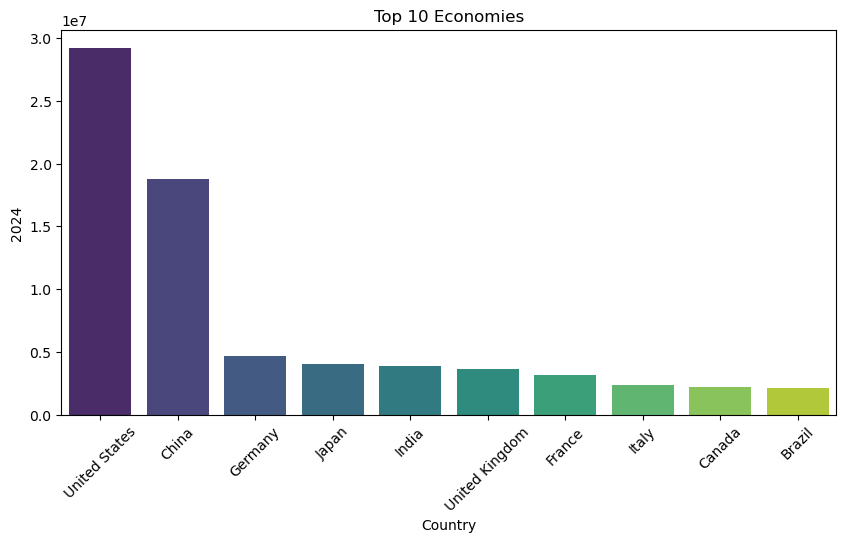

In [35]:
top_10 = df.sort_values("2024", ascending=False ).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = "Country", y = "2024", data = top_10,palette="viridis")
plt.xticks(rotation=45)

plt.title("Top 10 Economies")
plt.show()

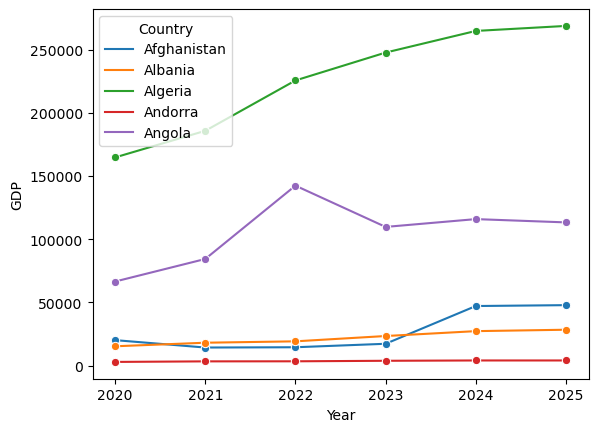

In [36]:
sample_countries = ["Afghanistan","Albania","Algeria","Andorra","Angola"]
df_long = df.melt(id_vars="Country", value_vars=years, var_name="Year", value_name="GDP")

sns.lineplot(data=df_long[df_long["Country"].isin(sample_countries)], x="Year", y="GDP", hue="Country", marker="o")
plt.show()

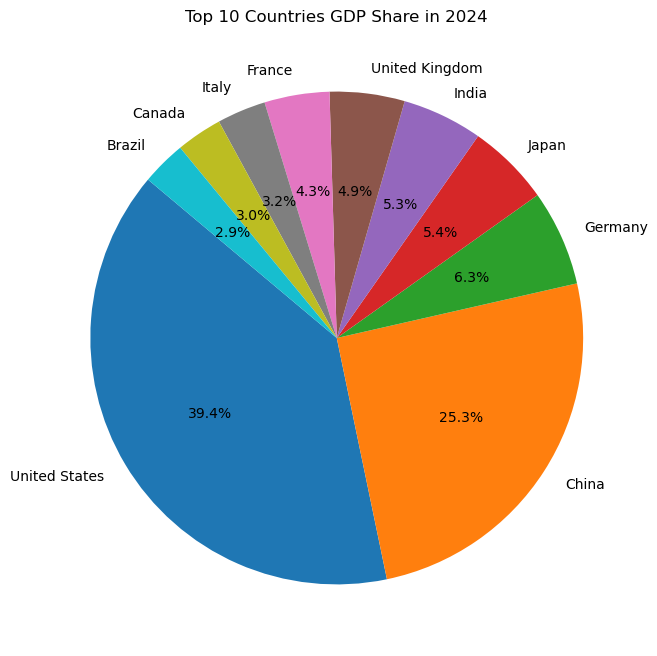

In [37]:
plt.figure(figsize=(8,8))
plt.pie(top_10["2024"], labels=top_10["Country"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Countries GDP Share in 2024")
plt.show()

In [38]:
# Features: GDP values 2020–2024
X = df[['2020','2021','2022','2023','2024']]

# Target: GDP 2025
y = df['2025']

# Handle any remaining NaNs
X = X.fillna(X.median())
y = y.fillna(y.median())

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print("RMSE:", round(mean_squared_error(y_test, y_pred, squared=False),2))
    print("MAE:", round(mean_absolute_error(y_test, y_pred),2))
    print("R2 Score:", round(r2_score(y_test, y_pred),2))

Linear Regression Results:
RMSE: 132742.79
MAE: 49341.1
R2 Score: 0.98
Random Forest Results:
RMSE: 65223.61
MAE: 26263.52
R2 Score: 1.0
Gradient Boosting Results:
RMSE: 124045.6
MAE: 51405.4
R2 Score: 0.99


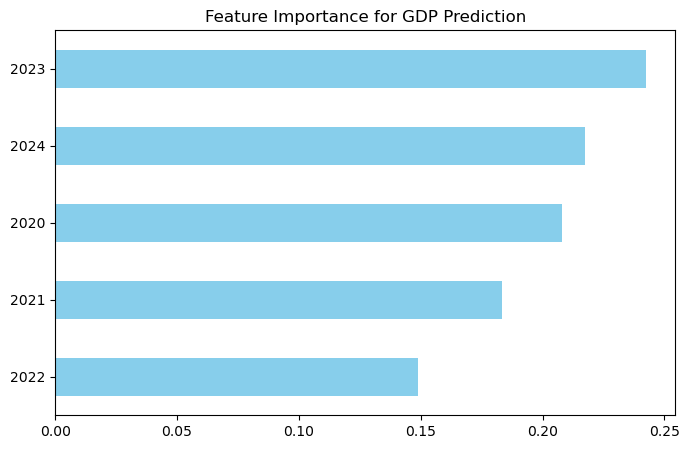

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Feature Importance for GDP Prediction")
plt.show()